In [55]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [56]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [57]:
len(X_train)

60000

In [58]:
len(X_test)

10000

In [59]:
X_train[0].shape

(28, 28)

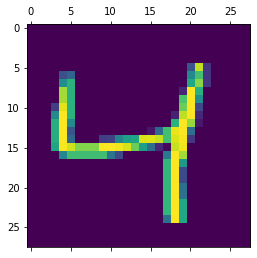

In [60]:
plt.matshow(X_train[2])

In [61]:
y_train[2]

4

In [62]:
X_train = X_train/255
X_test = X_test/255

In [63]:
X_train_flattened= X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [64]:
X_test_flattened.shape

(10000, 784)

In [65]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [66]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation ='sigmoid')
])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics= ['accuracy']
)
model.fit(X_train_flattened, y_train, epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 2s 984us/step - loss: 0.7200 - accuracy: 0.8129
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3046 - accuracy: 0.9145
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2879 - accuracy: 0.9201
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2714 - accuracy: 0.9250
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2667 - accuracy: 0.9254
Epoch 6/10
1875/1875 [==============================] - 2s 950us/step - loss: 0.2596 - accuracy: 0.9272
Epoch 7/10
1875/1875 [==============================] - 2s 948us/step - loss: 0.2516 - accuracy: 0.9297
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2576 - accuracy: 0.9284
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2515 - accuracy: 0.9304
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss:

In [67]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2656 - accuracy: 0.9277


[0.26558229327201843, 0.9276999831199646]

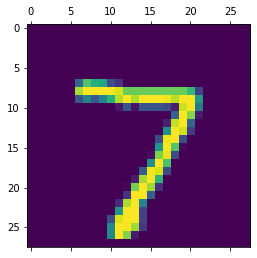

In [68]:
plt.matshow(X_test[0])

In [69]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([6.2805116e-03, 2.0174097e-08, 1.4577329e-02, 9.7142398e-01,
       2.1134317e-03, 1.3284019e-01, 4.4876501e-08, 9.9982607e-01,
       8.8770419e-02, 6.5727150e-01], dtype=float32)

In [70]:
np.argmax(y_predicted[0])

7

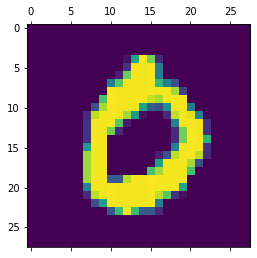

In [71]:
plt.matshow(X_test[3])

In [72]:
y_predicted = model.predict(X_test_flattened)
y_predicted[3]


array([9.9976194e-01, 8.8984917e-09, 7.2622508e-02, 2.9725432e-03,
       3.7442103e-05, 4.7825217e-02, 7.8634590e-02, 5.4216385e-03,
       1.6691297e-02, 1.0785729e-02], dtype=float32)

In [73]:
np.argmax(y_predicted[3])

0

In [74]:
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [75]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [77]:
cm= tf.math.confusion_matrix(labels= y_test, predictions= y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   8,    8,  928,   12,    7,    3,   11,    8,   44,    3],
       [   4,    0,   20,  920,    1,   22,    2,    9,   26,    6],
       [   2,    1,    7,    1,  927,    0,    8,    4,   11,   21],
       [  11,    2,    1,   34,    9,  774,   12,    8,   36,    5],
       [  15,    3,    9,    1,    7,   12,  907,    1,    3,    0],
       [   1,    7,   25,    4,    9,    1,    0,  947,    3,   31],
       [   7,    7,    6,   18,    9,   19,    7,    7,  887,    7],
       [  11,    8,    1,    8,   37,    6,    0,   22,    8,  908]])>

Text(69.0, 0.5, 'True')

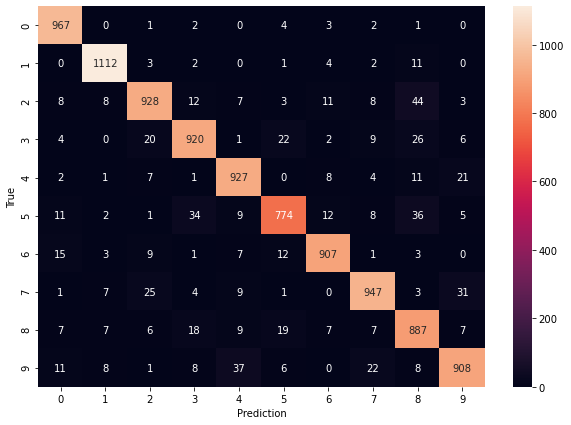

In [78]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel('Prediction')
plt.ylabel('True')

In [82]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape= (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer ='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4501 - accuracy: 0.8723
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1278 - accuracy: 0.9635
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0848 - accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0673 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0506 - accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0398 - accuracy: 0.9880
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0298 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0257 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0212 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.016

In [83]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0870 - accuracy: 0.9769


[0.08695702999830246, 0.9768999814987183]

In [86]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels= [np.argmax(i) for i in y_predicted]

cm= tf.math.confusion_matrix(labels= y_test, predictions= y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    2,    1,    1,    1,    1,    1,    1,    0],
       [   0, 1128,    2,    1,    0,    0,    2,    0,    2,    0],
       [   5,    2, 1015,    1,    1,    0,    2,    4,    2,    0],
       [   0,    0,   11,  986,    0,    1,    0,    2,    3,    7],
       [   0,    0,    6,    0,  967,    0,    2,    0,    1,    6],
       [   3,    0,    0,   17,    3,  858,    6,    0,    3,    2],
       [   7,    3,    3,    1,    6,    5,  932,    1,    0,    0],
       [   1,    6,   10,    4,    3,    0,    0,  998,    1,    5],
       [   7,    0,    7,    2,    5,    2,    2,    1,  945,    3],
       [   3,    3,    1,    3,   22,    1,    0,    5,    4,  967]])>

Text(69.0, 0.5, 'True')

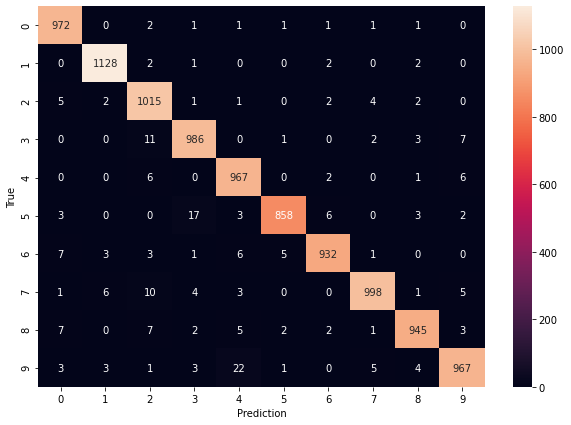

In [87]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel('Prediction')
plt.ylabel('True')

In [88]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape= (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer ='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4542 - accuracy: 0.8708
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1348 - accuracy: 0.9606
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0903 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0668 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0496 - accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0400 - accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0309 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0265 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0222 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018